In [1]:
import pandas as pd
import os
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt

# RP-PCA toy implementation
## Portfolio sorts

Sourced from:

https://sites.google.com/site/serhiykozak/data
    
These portfolios were used in Haddad, Kozak, Santosh (2020) "Factor Timing"

<Axes: ylabel='anomaly,port'>

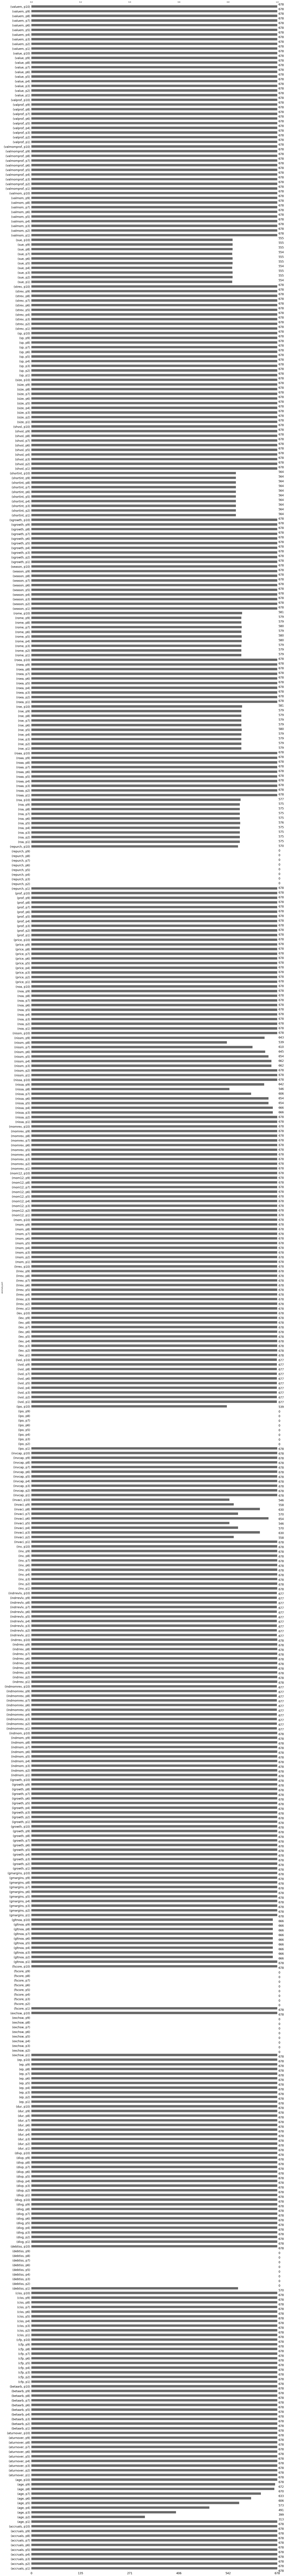

In [2]:
fldr = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data'))
raw_sorts = pd.read_pickle(f"{fldr}/sorts.pkl")

msno.bar(raw_sorts)

In [3]:
# Dropping portfolios with missing value for the sake of this exercise
sorts = raw_sorts.copy().dropna(axis=1)

## RP-PCA implementation

In [4]:
from latentfactors.core.rppca import RiskPremiumPCA

mdl = RiskPremiumPCA(gamma=10, n_factors=5)

mdl.fit(
    excess_returns=sorts,
    std_norm=True,
    orthogonalize=False,
    var_norm=True,
)

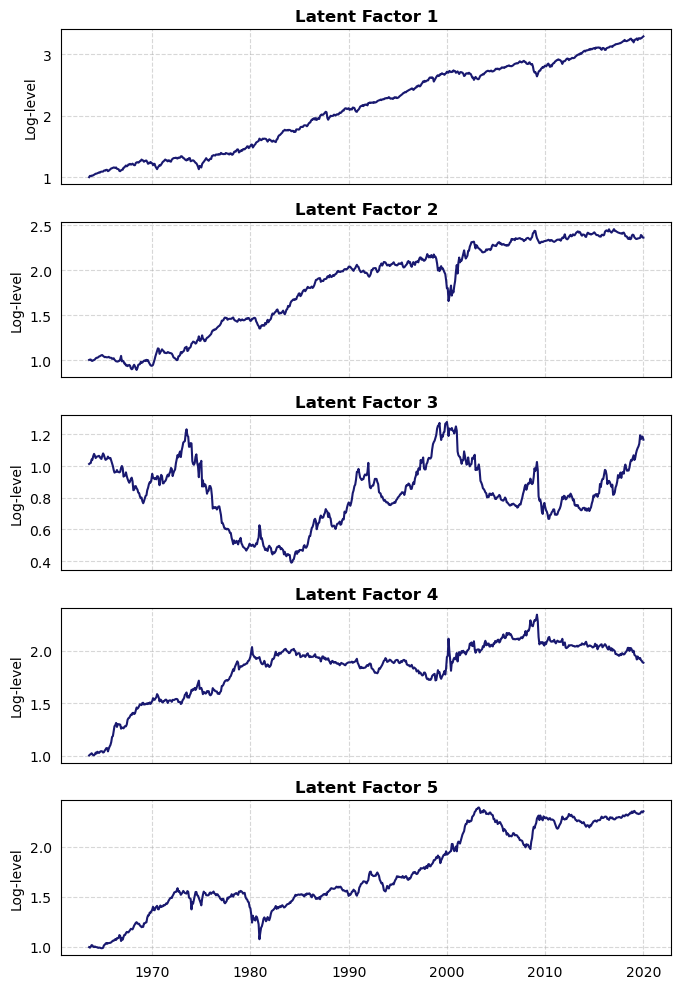

In [5]:
fig, axs = plt.subplots(nrows=mdl._k, figsize=(7, 2 * mdl._k), sharex=True)
for ax, (f, ts) in zip(axs, mdl.factors.items()):
    ax.plot(ts.add(1).cumprod().mul(10).apply(np.log10), zorder=25, color='midnightblue')
    ax.grid(ls='--', alpha=.5, zorder=-25)
    ax.set_title(f"Latent Factor {f + 1}", weight='bold')
    ax.set_ylabel("Log-level")
    ax.tick_params(left=False, bottom=False)

plt.tight_layout()
plt.show()